### Frequency extraction

In [77]:
%matplotlib inline
import soundfile as sf
import IPython.display as ipd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import scipy
from librosa.display import specshow
import librosa

In [143]:
VIBRATO_WAV = '../datasets/guitar/vibrato.wav'
OPENA_WAV = '../datasets/guitar/open-a.wav'

In [144]:
ipd.Audio(OPENA_WAV, rate=44100)

In [160]:
import matplotlib.pyplot as plt
y, sr = librosa.load(OPENA_WAV)
bin2048_to_freq = librosa.fft_frequencies(sr, 2048)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

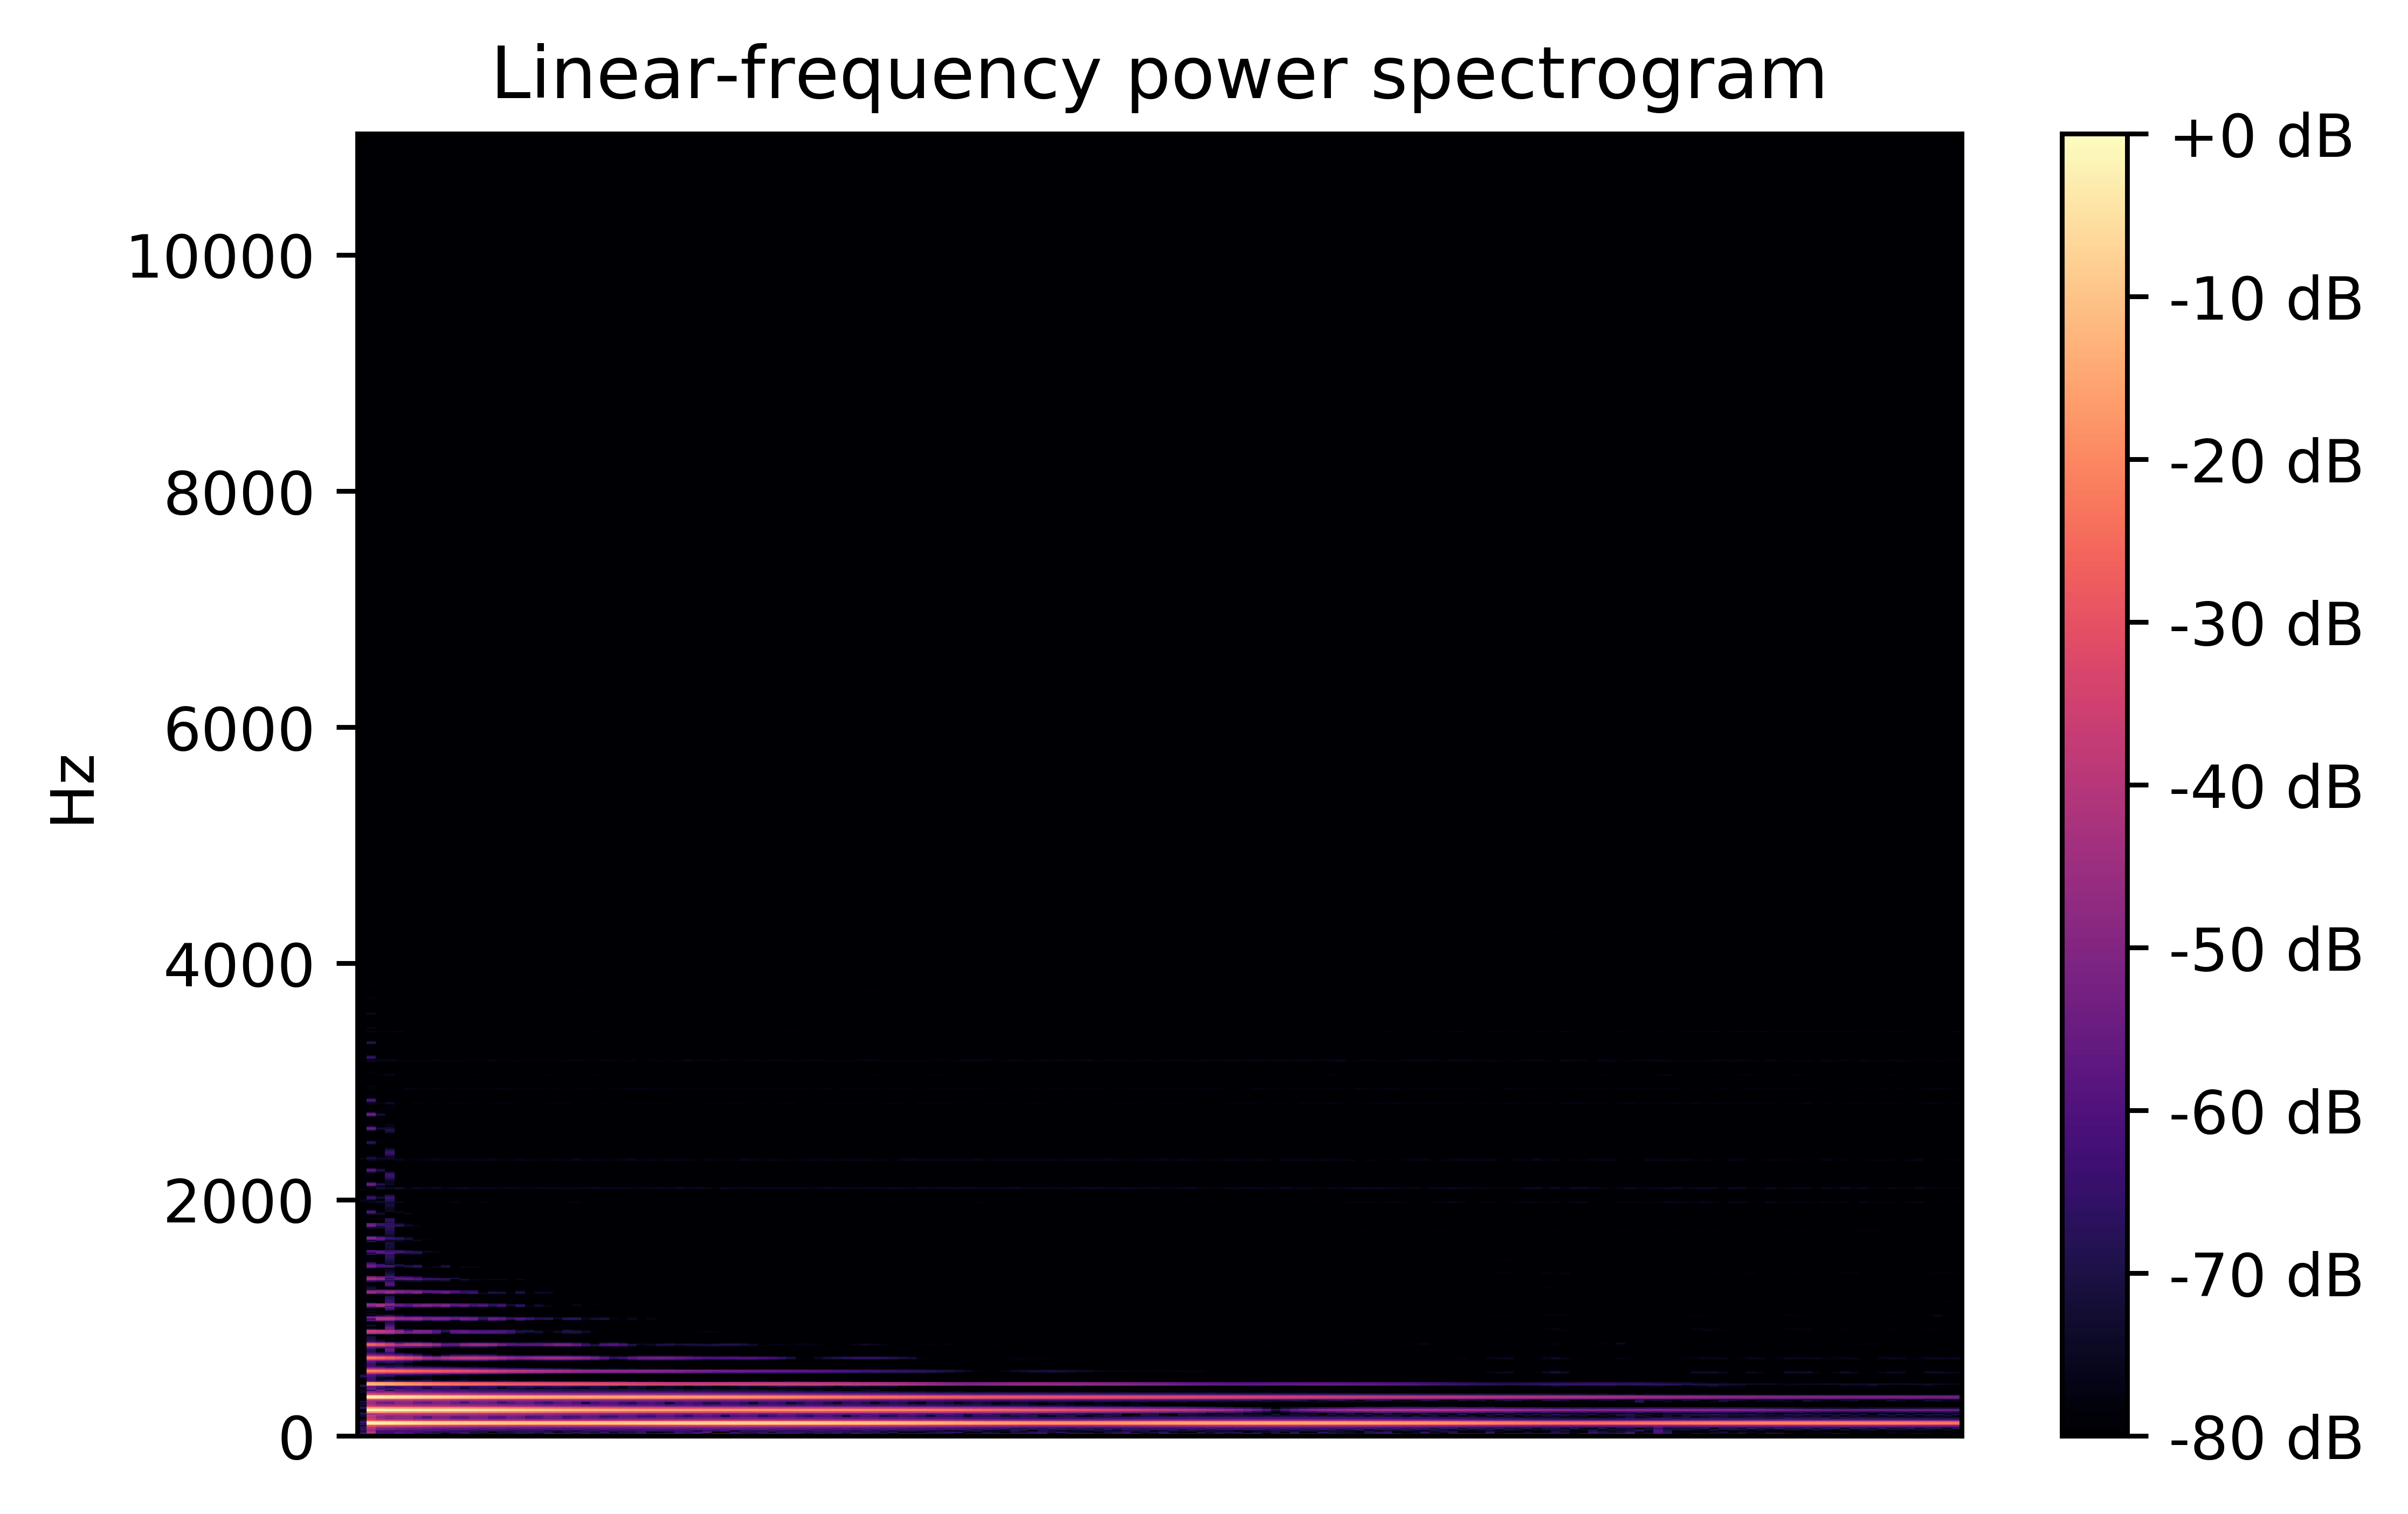

In [145]:
plt.figure(dpi=800)

D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=2048, win_length=2048)), ref=np.max)
# plt.subplot(4, 2, 1)
specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

create an algorithm that extracts the N loudest frequencies and returns them

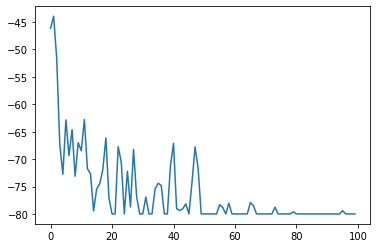

In [146]:
plt.figure()
plt.plot(D[:100,0])

In [168]:
def get_n_top_freqs(fftdata, N):
    ind = np.argpartition(fftdata,-N)[-N:]
    # ind[np.argsort(one_sliver[ind])]
    return bin2048_to_freq[ind]

In [170]:
top_N = get_n_top_freqs(D[:,40], 20)
top_N

array([ 75.36621094, 247.63183594, 193.79882812, 139.96582031,
       452.19726562, 312.23144531, 226.09863281, 344.53125   ,
       129.19921875, 204.56542969, 430.6640625 , 322.99804688,
        86.1328125 , 333.76464844, 236.86523438, 441.43066406,
       215.33203125,  96.89941406, 107.66601562, 118.43261719])

In [171]:
def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data
def oscillator(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase=0.0, wave_type='sinusoid'):
    
    if wave_type not in ['sinusoid', 'triangle', 'square']:
        return None
    
    if wave_type == 'sinusoid':
        return sinusoid(freq=freq, dur=dur, srate=srate, amp=amp, phase=phase)
    
    wave = sinusoid(freq=freq, dur=dur, amp=amp)
    
    for i in range(1,20):
        harmonic = 2*i+1
        sin = sinusoid(freq=freq*harmonic, dur=dur, amp=amp)
        if wave_type == 'triangle':
            sin = sin*(np.power(-1,i))*(harmonic**-2)
        else:
            sin = sin / harmonic
        wave = np.add(wave, sin)
        
    if wave_type == 'square':
        return wave * 4 / np.pi 
    if wave_type == 'triangle':
        return wave * np.pi / 4

In [182]:

def combine_freq(freqs, duration):
    output = oscillator(0, duration)
    print(freqs)
    for freq in freqs:
        output = np.add(output, oscillator(freq, duration))
    return output
stft_test = combine_freq(top_N, 3)
ipd.Audio(stft_test, rate=44100)

[ 75.36621094 247.63183594 193.79882812 139.96582031 452.19726562
 312.23144531 226.09863281 344.53125    129.19921875 204.56542969
 430.6640625  322.99804688  86.1328125  333.76464844 236.86523438
 441.43066406 215.33203125  96.89941406 107.66601562 118.43261719]


# Take 2

In [188]:
ipd.Audio(y, rate=44100)

In [183]:
D2 = np.abs(scipy.fft(y, 2048))
D2 = D2[:len(D2)//2]

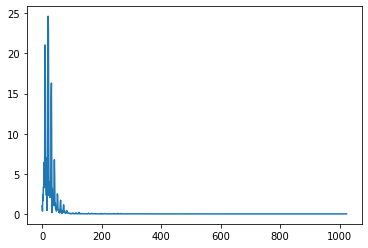

In [184]:
plt.figure()
plt.plot(D2)

In [189]:
d2_top = get_n_top_freqs(D2, 2)

In [190]:
D2_test = combine_freq(d2_top, 3)
ipd.Audio(D2_test, rate=44100)

[226.09863281 215.33203125]
